In [1]:
# Read and clean data

# Read and clean data

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from helpers import make_aesthetic, array_stats, categorical_stats

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from stargazer.stargazer import Stargazer

mypal = make_aesthetic()



def clean_shallow_deep(x):
    # because scale is -2, -1, 0, 1, 2 and qualtrics is 1, 2, 3, 4, 5
    # So this function turns metric into -2 to 2 in direction of <deep --> shallow> 

    if pd.isna(x):
        return None 
    return (int(x) - 3) * -1

def clean_general(x):
    # Take first character
    if pd.isna(x):
        return None
    return int(x[0])

def clean_even(x):
    # qualtrics is coding as 1, 2, 3, 4, 5
    # semantic scale was # (normalize to -2, -1, 0, 1, 2)
    # where 0 meant both equal. 
    # So we want to penalize large deviations from 0 
    if pd.isna(x):
        return None
    x2 = int(x) - 3 # (normalize to -2, -1, 0, 1, 2)
    if x2 in [-2, 2]:
        return 1
    elif x2 in [-1, 1]:
        return 2
    elif x2 == 0:
        return 3

df = pd.read_csv('data/raw/deep_shallow_2025-04-13_April+13,+2025_19.14.csv')
df = df.iloc[2:]

data = []
for idx, row in df.iterrows():
    
    # participant data
    duration = row['Duration (in seconds)']
    pid = row['pid']
    deep_shallow_1 = row['deep_shallow_1']
    deep_shallow_2 = row['deep_shallow_2']
    educ = row['educ']
    income = row['income']
    gender = row['gender']
    age = row['Age']
    ai_usage = row['ai_usage']
    con = row['con']
    
    participant_data = {
        "duration": duration,
        "pid": pid,
        "deep_shallow_1": deep_shallow_1,
        "deep_shallow_2": deep_shallow_2,
        "educ": educ,
        "income": income,
        "gender": gender, 
        "age": age,
        "ai_usage": ai_usage,
        "con": con
    }
    
    llm_shallow_cols = [x for x in df.columns if "lm_shallow_" in x]
    for col in llm_shallow_cols:
        data_pt = {
            "raw_col": col,
            "metric": "deep_shallow",
            "loop_merge": int(col.split("_")[0]),
            "answer_raw": row[col],
            "answer": clean_shallow_deep(row[col]),
        }
        data_pt.update(participant_data)
        data.append(data_pt)
        
    llm_general_cols = [x for x in df.columns if "lm_general" in x]
    for col in llm_general_cols:
        data_pt = {
            "raw_col": col,
            "metric": "general",
            "loop_merge": int(col.split("_")[0]),
            "answer_raw": row[col],
            "answer": clean_general(row[col]),
        }

        data_pt.update(participant_data)
        data.append(data_pt)
    llm_split_cols = [x for x in df.columns if "lm_split" in x]
    for col in llm_split_cols:
        data_pt = {
            "raw_col": col,
            "metric": "even",
            "loop_merge": int(col.split("_")[0]),
            "answer_raw": row[col],
            "answer": clean_even(row[col]),
        }
        data_pt.update(participant_data)
        data.append(data_pt)
    
    
df = pd.DataFrame(data)
df = df.dropna(subset=['answer'])
meta_df = pd.read_csv('data/clean/qualtrics_loop_merge_deep_shallow.csv')
df = pd.merge(df, meta_df, how='left', left_on=['loop_merge'], right_on=['idx'])
df['name'] = df['name1'] + "/" + df['name2']


    
dfs = {}
dfs['deep_shallow'] = df[df['metric'] == 'deep_shallow']
dfs['general'] = df[df['metric'] == 'general']
dfs['even'] = df[df['metric'] == 'even']
    

FileNotFoundError: [Errno 2] No such file or directory: 'data/raw/deep_shallow_2025-04-13_April+13,+2025_19.14.csv'

In [3]:
meta_df

,name,name1,name1_def,name2,name2_def,set,idx
0,Adaptability,Adaptive,Preferring AI agents adjust their behavior bas...,Static,Preferring AI agents maintain consistent behav...,shallow,1
1,Autonomy,Autonomous,Preferring AI agents that operate independentl...,Controlled,Preferring AI agents that require user guidanc...,shallow,2
2,Complexity,Simple,Preferring AI interactions that are straightfo...,Complex,Preferring AI interactions that are intricate ...,shallow,3
3,Conciseness,Concise,Preferring AI responses that are brief and to ...,Detailed,Preferring AI responses that are thorough and ...,shallow,4
4,Content Type,Factual,Preferring AI interactions that focus on factu...,Opinionated,Preferring AI interactions that include opinio...,shallow,5
5,Data Usage,Data Minimal,Preferring AI that uses minimal personal data.,Data Maximal,Preferring AI that uses extensive personal dat...,shallow,6
6,Decision-Making,Decisive,Preferring AI that makes quick decisions.,Deliberative,Preferring AI that takes time to consider opti...,shallow,7
7,Emotional Tone,Empathetic,Preferring AI interactions that are sensitive ...,Neutral,Preferring AI interactions that are emotionall...,shallow,8
8,Engagement Level,High Engagement,Preferring AI interactions that are interactiv...,Low Engagement,Preferring AI interactions that are straightfo...,shallow,9
9,Error Handling,Forgiving,Preferring AI systems that are lenient and tol...,Strict,Preferring AI systems that enforce rules and r...,shallow,10


# Shallowness: Preferences vs values 

## Plot and descriptives

/var/folders/kj/8p_kqzx533b8vldhm5sdjfc00000gn/T/ipykernel_25792/736208484.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs['deep_shallow']['clean_set'] = dfs['deep_shallow']['set'].replace({'shallow': 'Shallow\nPreferences', 'deep': 'Deep\nValues'})
/var/folders/kj/8p_kqzx533b8vldhm5sdjfc00000gn/T/ipykernel_25792/736208484.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.pointplot(data=dfs['deep_shallow'], x='clean_set', y='answer', palette=mypal)
/var/folders/kj/8p_kqzx533b8vldhm5sdjfc00000gn/T/ipykernel_25792/736208484.py:2: UserWarning: The palette list has more values (15) than needed (2), w

Deep value stats
M = -0.98, SD = 1.03, Mdn = -1.00
Mode = -1.00
95% CI [-1.16, -0.78]
Shallow preference stats
M = 0.24, SD = 1.50, Mdn = 1.00
Mode = 1.00
95% CI [0.01, 0.46]
cohens d 0.9156012149780963
cles 0.7246921477690709
t(278) = -8.08, p < .001


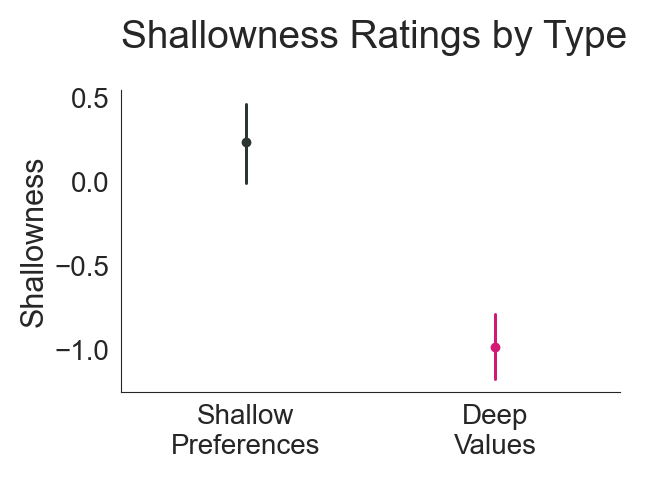

In [4]:
dfs['deep_shallow']['clean_set'] = dfs['deep_shallow']['set'].replace({'shallow': 'Shallow\nPreferences', 'deep': 'Deep\nValues'})
sns.pointplot(data=dfs['deep_shallow'], x='clean_set', y='answer', palette=mypal)

plt.title("Shallowness Ratings by Type")
plt.xlabel("")
plt.ylabel("Shallowness")

deep_value_ratings = dfs['deep_shallow'].query('set == "deep"')['answer'].values
shallow_pref_ratings = dfs['deep_shallow'].query('set == "shallow"')['answer'].values

print("Deep value stats")
array_stats(deep_value_ratings, include_ci=True)

print("Shallow preference stats")
array_stats(shallow_pref_ratings, include_ci=True)

from pingouin import compute_effsize

print("cohens d", compute_effsize(shallow_pref_ratings, deep_value_ratings, paired=False, eftype='cohen'))
print("cles", compute_effsize(shallow_pref_ratings, deep_value_ratings, paired=False, eftype='cles'))

# ttest
from scipy import stats
t_stat, p_val = stats.ttest_ind(deep_value_ratings, shallow_pref_ratings, equal_var=False)
dof = len(deep_value_ratings) + len(shallow_pref_ratings) - 2


p_formatted = "< .001" if p_val < 0.001 else f"= {p_val:.3f}"

print(f"t({dof:.0f}) = {t_stat:.2f}, p {p_formatted}")



## Can people tell the difference?

In [ ]:
# Basic calcs
############################
############################

from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

shallow_deep = dfs['deep_shallow'].copy()
filtered_shallow_deep = shallow_deep[shallow_deep['answer'] != 0]

# Update y_true and y_pred based on the filtered data
y_true = (filtered_shallow_deep['set'] == 'shallow').astype(int)
y_pred = (filtered_shallow_deep['answer'] > 0).astype(int)

# Compute confusion matrix and classification report
cm = confusion_matrix(y_true, y_pred)
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, 
                              display_labels=['Deep', 'Shallow'])
cmd.plot()
plt.title('Confusion Matrix')
plt.savefig('plots/confusion_matrix_filtered.pdf', bbox_inches='tight', dpi=300)

print("\nClassification Report (Filtered):")
print(classification_report(y_true, y_pred, 
                            target_names=['Deep', 'Shallow'],
                            digits=3))




# More plots
############################
############################
# First Plot: Perceived Shallowness by Category
plt.figure(figsize=(8, 6))
make_aesthetic(font_scale=1.2)

sns.violinplot(data=dfs['deep_shallow'], x='clean_set', y='answer',
               inner=None, color='lightgray')
sns.stripplot(data=dfs['deep_shallow'], x='clean_set', y='answer',
              size=4, alpha=0.3, jitter=0.2, color=mypal[2])
sns.pointplot(data=dfs['deep_shallow'], x='clean_set', y='answer',
              scale=0.5, color=mypal[1])

cohens_d = compute_effsize(shallow_pref_ratings, deep_value_ratings, paired=False, eftype='cohen')
plt.text(0.05, 0.95, f"Cohen's d = {cohens_d:.2f}",
         transform=plt.gca().transAxes,
         bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'),
         fontsize=10)

plt.title('Perceived Shallowness by Category', pad=20)
plt.xlabel('')
plt.ylabel('Shallowness Rating')
plt.savefig('plots/violin_plot.pdf', bbox_inches='tight', dpi=300)
plt.show()

# Second Plot: Classification Accuracy Matrix
plt.figure(figsize=(8, 6))
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

sns.heatmap(cm_norm, annot=True, fmt='.2f',
            cmap='RdYlBu_r',
            xticklabels=['Deep', 'Shallow'],
            yticklabels=['Deep', 'Shallow'])

cbar = plt.gca().collections[0].colorbar
cbar.set_label('Proportion')

plt.title('Classification Accuracy Matrix (Rows Sum to 1)', pad=20)
plt.xlabel('Predicted')
plt.ylabel('True')
sns.despine()
plt.savefig('plots/confusion_matrix_plot.pdf', bbox_inches='tight', dpi=300)
plt.show()


In [ ]:
import statsmodels.api as sm
from statsmodels.regression.mixed_linear_model import MixedLM

# Run model
##############
##############

tdf = dfs['deep_shallow']
tdf['group'] = 1
tdf['z_answer'] = (tdf['answer'] - tdf['answer'].mean()) / tdf['answer'].std()

# statsmodels crossed random fx syntax from here (https://stackoverflow.com/questions/78525102/crossed-random-effects-in-python-with-statsmodels)
# says to set group dummy variable to 1
model = MixedLM.from_formula('z_answer ~ set', groups='group', data=tdf, 
                             vc_formula={'id1': "0 + C(name)",
                                         'id2': "0 + C(pid)"})
res = model.fit(reml=True)
print(res.summary())

# Write to latex
##############
##############
from stargazer.stargazer import Stargazer
st = Stargazer([res])
st.table_label = "shallow_mixed"
st.title_text = "Mixed model with crossed random intercepts for participants and items. The DV is our shallowness measure, z-scored. The coefficient on 'shallow' is the difference, in standard deviations, between the shallowness of shallow preferences versus deep values---accounting for participant and item dependencies."
latex = st.render_latex()
latex = latex.replace("id1 Var", "Item Variance")
latex = latex.replace("id2 Var", "Person Variance")
latex = latex.replace("set[T.shallow]", "IsShallowPref")
latex = latex.replace("z_answer", "Z-Scored Shallowness")
with open(f'tables/{st.table_label}.tex', 'w') as f:
    f.write(latex)

In [ ]:
st.table_label = "shallow_mixed"
st.title_text = "Mixed model with crossed random intercepts for participants and items. The DV is our shallowness measure, z-scored. The coefficient on 'shallow' is the difference, in standard deviations, between the shallowness of shallow preferences versus deep values---accounting for participant and item dependencies."
latex = st.render_latex()
latex = latex.replace("id1 Var", "Item Variance")
latex = latex.replace("id2 Var", "Person Variance")
latex = latex.replace("set[T.shallow]", "IsShallowPref")
with open('output_table.tex', 'w') as f:
    f.write(latex)


# Plot by index

In [ ]:

# Get data
########################
########################
shallow = df.query("set == 'shallow'")



d = shallow.query("metric == 'deep_shallow'").groupby('name').agg({'answer': ['mean', 'std']}).dropna()
d.columns = ['mean_deep_shallow', 'std_deep_shallow']
d['snr_deep_shallow'] = d['mean_deep_shallow'] / (d['std_deep_shallow']+0.001)

d2 = shallow.query("metric == 'general'").groupby('name').agg({'answer': ['mean', 'std']}).dropna()
d2.columns = ['mean_general', 'std_general']
d2['snr_general'] = d2['mean_general'] / (d2['std_general'] + 0.001)

d3 = shallow.query("metric == 'even'").groupby('name').agg({'answer': ['mean', 'std']}).dropna()
d3.columns = ['mean_even', 'std_even']
d3['snr_even'] = d3['mean_even'] / (d3['std_even'] + 0.001)

d = pd.concat([d, d2, d3], axis=1)
d.dropna(subset=['snr_deep_shallow', 'snr_general', 'snr_even'], inplace=True)




# Plot
# Logic: alpha*Rank(deep_shallow) + (1-alpha)/2* Rank(general) + (1-alpha)/2 * Rank(even)
# Optional: Use SNR or mean
########################
########################
make_aesthetic(font_scale=1)
alphas = [1, 0.5, 0.33]
use_snr_values = [True, False]

fig, axes = plt.subplots(len(alphas), len(use_snr_values), figsize=(12, 18), sharex=True, sharey=True)

# Earlier code remains the same until the ranking part

for i, alpha in enumerate(alphas):
    for j, use_snr in enumerate(use_snr_values):
        plt.sca(axes[i, j])  
        if not use_snr:
            rel_cols = ['mean_deep_shallow', 'mean_general', 'mean_even']
        else:
            rel_cols = ['snr_deep_shallow', 'snr_general', 'snr_even']

        for col in rel_cols:
            # assigns a percentile rank where 1 means highest thing
            d[col] = d[col].rank(ascending=True, method='min', pct=True)

        other_alphas = (1 - alpha) / 2
        d['indx'] = alpha * d[rel_cols[0]] + other_alphas * d[rel_cols[1]] + other_alphas * d[rel_cols[2]]

        # Get top and bottom items
        top = d.nlargest(50, 'indx')
        bottom = d.nsmallest(50, 'indx')
        extreme = pd.concat([top, bottom])
        
        make_aesthetic(font_scale=1)
        sns.barplot(data=extreme, y='name', x='indx', ax=axes[i, j])
        axes[i, j].set_title(f"alpha={alpha}, {'SNR (Mean/SD)' if use_snr else 'Mean'}")
        axes[i, j].set_xlabel("Index")
        axes[i, j].set_ylabel("")

plt.tight_layout()
plt.savefig('plots/index_plot.pdf', bbox_inches='tight', dpi=300)
plt.show()



## General desc stats

In [ ]:
make_aesthetic(font_scale=2)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
df['pretty_metric'] = df['metric'].replace({
    'deep_shallow': 'Shallowness',
    'general': 'Broadness',
    'even': 'Neutrality'})
metrics = df['pretty_metric'].unique()

shallow = df.query("set == 'shallow'")

for i, metric in enumerate(metrics):
    metric_data = shallow[shallow['pretty_metric'] == metric]
    
    value_counts = metric_data['answer'].value_counts().sort_index()
    sns.barplot(x=value_counts.index, y=value_counts.values, ax=axes[i], color='lightgray')
    
    stats = metric_data['answer'].describe()
    stats_text = f"mean: {stats['mean']:.2f}\nstd: {stats['std']:.2f}\nn: {stats['count']:.0f}"
    axes[i].text(0.05, 0.95, stats_text, transform=axes[i].transAxes,
                verticalalignment='top')
    
    axes[i].set_title(metric)
    axes[i].set_xlabel('Response')
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.savefig('plots/general_desc_stats.pdf', bbox_inches='tight', dpi=300)



In [ ]:
# Desc stats
################
categorical_stats(df.query("metric == 'even'")['answer'], sort_by='alphabetical')

array_stats(df.query("metric == 'general'")['answer'])
_

In [11]:
df.query

<bound method DataFrame.query of              raw_col        metric  loop_merge answer_raw  answer duration  \
0     2_lm_shallow_1  deep_shallow           2          4    -1.0      263   
1     6_lm_shallow_1  deep_shallow           6          2     1.0      263   
2     9_lm_shallow_1  deep_shallow           9          4    -1.0      263   
3    11_lm_shallow_1  deep_shallow          11          4    -1.0      263   
4    13_lm_shallow_1  deep_shallow          13          2     1.0      263   
..               ...           ...         ...        ...     ...      ...   
835  49_lm_shallow_1  deep_shallow          49          5    -2.0     1696   
836  51_lm_shallow_1  deep_shallow          51          4    -1.0     1696   
837  53_lm_shallow_1  deep_shallow          53          5    -2.0     1696   
838  55_lm_shallow_1  deep_shallow          55          4    -1.0     1696   
839  57_lm_shallow_1  deep_shallow          57          4    -1.0     1696   

                          pid 